___
# Ciência dos Dados - PROJETO 3 - INSPER

___
## Nome 1 - Augusto Franco de Paula

## Nome 2 - Gabriel Heusi Pereira Bueno de Camargo

## Nome 3 - Pedro Henrique Carvalho Daher

___

___

# INTRODUÇÃO

        A partir de um interesse sobre carros, o grupo optou por fazer um modelo de previsão dos preços de carros e ainda analisar aqueles considerados "Overpriced", ou seja acima do preço considerado padrão para determinado modelo. 
        A base de dados utilizada para o estudo é de 2017 e avalia apenas carros americanos, dessa forma deve-se explorar esta afim de possibilitar tal modelo de predição. Para isso será importante avaliar quais as variáveis de maior influência sobre o preço de um carro para que ao fim haja uma comparação entre o preço real do carro e seu preço esperado a partir das variáveis que o definem. Por fim a análise de carros acima do preço servirá como dado de eficiência do estudo 
        Dessa forma baseou-se em artigos cientificos e estudos que avaliam os modelos de distribuicão destes preços, entre eles estão: 

___
# MINERANDO DADOS e CARACTERÍSTICAS DO DATASET

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import os
import math
from sklearn.linear_model import Ridge, Lasso
from sys import stdin
from numpy import arange
import numpy as np
import seaborn as sns
from sklearn import preprocessing, cross_validation, neighbors

In [18]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())
data = pd.read_csv('data.csv')


Esperamos trabalhar no diretório
C:\Users\Augusto\Desktop\DP Ciência dos Dados\Projeto3


# BASE DE DADOS

In [19]:
data = shuffle(data)
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
6671,Chevrolet,Malibu,2015,regular unleaded,196.0,4.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,36,25,1385,28195
223,Chrysler,300,2017,regular unleaded,292.0,6.0,AUTOMATIC,all wheel drive,4.0,NaN,Large,Sedan,27,18,1013,41135
6963,Pontiac,Montana,2005,regular unleaded,200.0,6.0,AUTOMATIC,all wheel drive,4.0,NaN,Midsize,Passenger Minivan,21,15,210,27700
3016,Chevrolet,Corvette,2017,premium unleaded (recommended),455.0,8.0,MANUAL,rear wheel drive,2.0,High-Performance,Compact,Convertible,25,16,1385,69195
5397,Volkswagen,Golf GTI,2016,premium unleaded (recommended),210.0,4.0,MANUAL,front wheel drive,2.0,"Hatchback,Performance",Compact,2dr Hatchback,34,25,873,28025


In [20]:
sns.heatmap(data.corr(), annot=True, fmt=".1f")

### A partir do mapa mostrado acima é possível identificar a influência (correlação) de uma variável sobre o preço de um carro. Dessa forma basta analisar e perceber que as três que apresentam maior proporcionalidade são: Ano de fabricação (Year), Potência do Motor (Engine HP) e número de cilindros (Engine Cylinders). Vale lembrar que isto era esperado, afinal essa ferramenta só é capaz de comparar dados quantitativos.

# Análise Descritiva

### A partir desta seção será reavaliada a ideia das variáveis e sua distribuição de acordo com o preço. Como por exemplo a "Engine Cylinders" será categorizado como uma espécie de força fornecida pelos cilindros ao carro e ainda observar onde a predominância do preço dos carros, separando em faixas de valor de compra/venda. 

In [21]:
data = data.loc[data['Engine Cylinders']>0,['Year','Engine HP','Engine Cylinders','MSRP']]
data = data.loc[data['MSRP']<125000,['Year','Engine HP','Engine Cylinders','MSRP']]
data = data.loc[data['Engine HP']>0,['Year','Engine HP','Engine Cylinders','MSRP']]
data.columns=["Ano","Potência","Cilindros","Price"]
data.dropna()

,Ano,Potência,Cilindros,Price
6671,2015,196.0,4.0,28195
223,2017,292.0,6.0,41135
6963,2005,200.0,6.0,27700
3016,2017,455.0,8.0,69195
5397,2016,210.0,4.0,28025
5393,2016,210.0,4.0,30135
5405,2017,210.0,4.0,25595
5302,2016,208.0,4.0,34500
4556,2017,365.0,6.0,59600
1225,2015,278.0,6.0,30495


In [22]:
faixa = range(5000,80000,3000)
price = pd.cut(data.Price, bins=faixa)
price.value_counts(sort=False, normalize=True)*100

(5000, 8000]       0.291545
(8000, 11000]      0.205161
(11000, 14000]     0.831444
(14000, 17000]     4.459562
(17000, 20000]     6.046863
(20000, 23000]     9.405032
(23000, 26000]    11.186697
(26000, 29000]    10.538819
(29000, 32000]    10.679192
(32000, 35000]     8.638376
(35000, 38000]     7.482993
(38000, 41000]     6.165641
(41000, 44000]     5.344995
(44000, 47000]     4.070835
(47000, 50000]     3.358169
(50000, 53000]     2.569917
(53000, 56000]     1.997624
(56000, 59000]     1.241767
(59000, 62000]     1.382140
(62000, 65000]     1.446928
(65000, 68000]     0.950221
(68000, 71000]     0.701868
(71000, 74000]     0.442717
(74000, 77000]     0.561494
Name: Price, dtype: float64

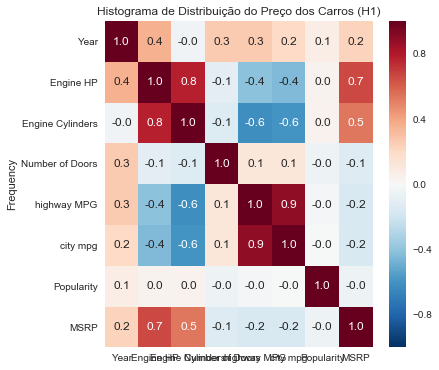

In [23]:
plot = data.Price.plot.hist(bins=faixa,title='Histograma de Distribuição do Preço dos Carros (H1)', figsize=(6, 6), alpha=0.9)
plt.show()

#### Histograma que possibilita a visualização da distribuição dos preços dos carros de acordo com faixas de preço.

___
# MODELOS DE PREDIÇÃO

[O tópico C.PROCESSO E ESTATÍSTICAS DE VALIDAÇÃO estará dentro deste tópico. Organize-o aqui de forma clara!]

[ORGANIZE AQUI TODOS OS MODELOS DE PREDIÇÃO NECESSÁRIOS NESTE PROJETO!]

o MODELO DE PREDIÇÃO PELA MÉDIA

o MODELO DOS K VIZINHOS MAIS PRÓXIMOS (K-Nearest Neighbors Regression)

o MODELO DE REGRESSÃO LINEAR (Multiple Linear Regression)

o MODELO DE ÁRVORES DE REGRESSÃO (Decision Tree Regression)

### Sepração da base de dados em treino e teste, considerando que 30% do dataframe ('data') será selecionado aleatoriamente para teste e os outros 70% para treinamento

In [24]:
from sklearn.model_selection import train_test_split as split
train, test = split(data, test_size=0.3)
train.describe()

,Ano,Potência,Cilindros,Price
count,7914.000000,7914.000000,7914.000000,7914.000000
mean,2010.254107,238.633561,5.501516,31659.182714
std,7.668393,92.542051,1.475803,20798.292798
min,1990.000000,55.000000,3.000000,2000.000000
25%,2006.000000,170.000000,4.000000,20499.250000
50%,2015.000000,220.000000,6.000000,29300.000000
75%,2016.000000,292.000000,6.000000,40342.500000
max,2017.000000,707.000000,12.000000,124900.000000


## MODELO DE PREDIÇÃO PELA MÉDIA

### O primeiro modelo de predição realizado foi pela média, que consiste basicamente na análise da média da variável que esperamos prever, no caso o preço dos carros. Para isso basta analisar a média de preços e essa será o valor esperado para o carro

In [25]:
print('O preço esperado de um carro a partir da predição pela média é:',train.Price.mean())

O preço esperado de um carro a partir da predição pela média é: 31659.18271417741


### Coeficiente de determinação (R2) e Raiz do erro médio quadrático (RMS)

In [26]:
#R2
#n = len(train)
#fi = train.Price.mean()
#ybarra = train.Price.mean()
#L1 = []
#L2 = []
#i=0
#while i<=n:
#    L1.append(((train.Price[i]-fi)**2))
#    L2.append(((train.Price[i]-ybarra)**2))
#    x1 = sum(L1)
#    x2 = sum(L2)
#    i=i+1
#x = x1/x2
#R2 = 1-x
#print(R2)

## MODELO DOS K VIZINHOS MAIS PRÓXIMOS (K-Nearest Neighbors Regression)

### A seguir deve ser feito um segundo modelo de predição, no caso o chamado K-Nearest Neighbors Regression, que consiste basicamente em prever o valor do carro baseado em seus vizinhos mais próximos e seus atributos (exceto preço, já que este é usado para o cálculo da média). Isto é, este modelo se fundamenta em descobrir o valor do preço através de uma média dos preços de seus k vizinhos mais próximos. Para determinar quais são os vizinhos mais próximos, um cáclulo é feito e os vizinhos são selecionados.

In [27]:
x = np.array(data.drop(['Price'],1))
y = np.array(data['Price'])

x_train, x_test,y_train, y_test=cross_validation.train_test_split(x,y,test_size=0.5)
clf=neighbors.KNeighborsClassifier()
clf.fit(x_train, y_train)
accuracy=clf.score(x_test, y_test)
print (accuracy)

0.0972934724925


### Na célula acima foi determinado o alvo à predição: "Price". A base train (25%) e test(75%) foi separada. Além disso uma nova ferramenta foi disposta para verificar a veracidade dos dados: "accuracy". Apesar do "accuracy estar próximo a 10%, o valor ("Price") deste modelo de regressão não ficou muito distante do valor ("Price") real.

In [28]:
ano = input('Digite o ano (2006 até 2017): ')
potencia = input("Digite a potencia (150 até 707): ")
cilindros = input("Digite a quantidade de cilindros (3 até 12): ")

ee=np.array([ano,potencia,cilindros])
ee=ee.reshape(1,-1)
prediction = clf.predict(ee)
print(prediction)

Digite o ano (2006 até 2017): 2010
Digite a potencia (150 até 707): 300
Digite a quantidade de cilindros (3 até 12): 6
[40650]


### Há aqui uma interação entre o usuário e o programa. Sendo que, através da célula acima e do modelo de ressão dos K-vizinhos mais próximos, o usuário é capaz de prever o preço de um carro digitando seu ano, sua potência e sua quantidade de cilindros.

### Coeficiente de determinação (R2) e Raiz do erro médio quadrático (RMS)

## MODELO DE REGRESSÃO LINEAR (Multiple Linear Regression)

## O próximo modelo preditivo a ser realizado para análise dos preços de carro é pelo método de regressão linear, este se baseia.... 

In [29]:
atributos = [ "Potência","Cilindros"]
objetivo = ['Price']

In [30]:
def ridge_regression(train, atributos, alpha):
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(train[atributos],train['Price'])
    y_pred = ridgereg.predict(train[atributos])
    return(y_pred)

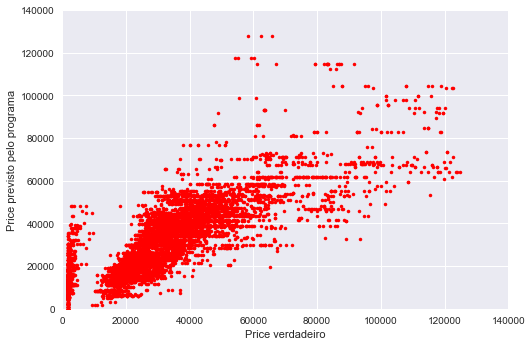

In [31]:
ridge = ridge_regression(train, atributos, 1e-20)
plt.plot(train['Price'],ridge,'.', color="red")
plt.axis([0, 140000, 0, 140000])
plt.xlabel("Price verdadeiro")
plt.ylabel("Price previsto pelo programa")
plt.show()

In [32]:
#from IPython.display import HTML, display
#import statsmodels.api as sm
#from statsmodels.formula.api import ols
#Y = train['Price']
#minhascolunas=['Ano','Potência','Cilindros']
#X=train[['Ano','Potência','Cilindros']]
#X=sm.add_constant(X)
#model = sm.OLS(Y,X)
#Tabelareg = model.fit()
#Tabelareg_summary = Tabelareg.summary()
#HTML(
#(Tabelareg_summary
#    .as_html()
#    .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;"> Adj. R-squared: </th>')
#    .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')
#    .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')
#    .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')
#    .replace('<th>[0.025</th>    <th>0.975]</th>', '<th style="background-color:#ff9896;">[0.025</th>    <th style="background-color:#ff9896;">0.975]</th>'))
#)

In [11]:
#import seaborn as sns
#%matplotlib inline
#h = sns.pairplot(train,x_vars=minhascolunas,y_vars="Price",size=7,aspect=0.7,kind = 'reg')
#plt.show()

In [ ]:
#PE=[]
#PR=[]
#for a in range(len(train)):
#        PE.append(Tabelareg.params.const+(Tabelareg.params.Ano*(train.Ano[a]))+(Tabelareg.params.Potência*(train.Potência[a]))+Tabelareg.params.Cilindros*(train.Cilindros[a]))
#        PR.append((train.Price[a]))
#scatter_plotscatter_  = plt.scatter(PE,PR,color="red",alpha=0.15)
#plt.title("Avaliação de Preço Estimado x Preço Real")
#plt.xlabel("Preço Estimado ($)")
#plt.ylabel("Preço Real ($)")
#plt.plot()
#plt.show()

### Coeficiente de determinação (R2) e Raiz do erro médio quadrático (RMS)

## MODELO DE ÁRVORES DE REGRESSÃO (Decision Tree Regression)

### O último modelo de predição necessário é conhecido por Decision Tree Regression, ou seja Árvores de Regressão. Nesse caso as árvores de decisão são usadas para ajustar uma curva senoidal com observação adicional de variáveis...

In [ ]:
from sklearn import tree
model = tree.DecisionTreeRegressor()
model.fit(X, Y)
model.score(X, Y)
ano = input('Digite o ano (2006 até 2017): ')
potencia = input("Digite a potencia (150 até 707): ")
cilindros = input("Digite a quantidade de cilindros (3 até 12): ")
ee=np.array([ano,potencia,cilindros,(train.Price.mean())])
ee=ee.reshape(1,-1)
predicted = model.predict(ee)
print(predicted)